# Линейная регрессия
Имеется пространство объектов $X$ (матрица объект-признак) и множество ответов $Y$. Требуется найти алгоритм $A: X\rightarrow Y$, который будет приближать $y$ на множестве $X$

Если вектор $Y$ принадлежит вещественным числам (т.е. $Y \in R$), то решаем задачу регрессии.
В случае линейной регрессии целевой вектор имеет вид $Y=XW$, где  $Y\in R^n$, $W\in R^p$, $X\in R^{n\times p}$. Здесь $n$ - количество объектов, $p$ - количество признаков, с помощью которых описывается объект. Например, для одного объекта можем записать: $y = w_0+w_1x_1+w_2x_2+...+w_px_p=w_0+\sum\limits_{1=1}^p w_ix_i$.

Рассмотрим одномерный пример, когда $y = w_0+w_1x_1$ (уравнение прямой $y=kx+b$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) # Для изменения размера шрифта на графиках

In [2]:
# Данные 
num_points = 100
X = np.random.random(num_points)*50
#print(x)
y = X + 10*np.random.randn(num_points)

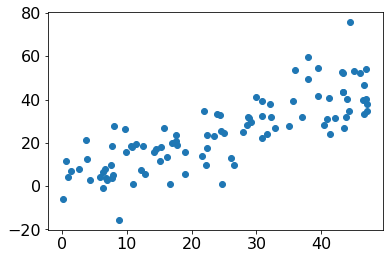

In [3]:
plt.scatter(X, y)

Как подобрать правильные веса? 

Необходимо ввести некую функцию (функцию потерь), которую затем будем минимизировать:
\begin{align*}
    \sum\limits_{objects} L(y_i, f(x_i)) \rightarrow min
\end{align*}
Решая оптимизационную задачу, можем найти параметры, которые минимизируют функцию потерь.

Функции потерь бывают разные. Рассмотрим одну из наиболее часто используемых - **MSE** (Mean Squared Error, среднеквадратичная ошибка):
\begin{align*}
    MSE = \frac{1}{n}\sum\limits_{i=1}^n\left(y_{true}-y_{predict}\right)^2
\end{align*}

In [4]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)
# Начальное приближение
w_1 = -0.58
w_0 = -2
y_pred = w_1*X + w_0
mse_loss(y, y_pred)

2278.630872704384

Решать оптимизационную задачу можно методом *градиентного спуска*.
На каждой итерации будем двигаться в сторону антиградиента и обновлять значение весов:
\begin{align*}
    w^{(k+1)}=w^{(k)}-\lambda\nabla_wL(w^{(k)})
\end{align*}
<center><img src="grad_desc.png" alt="drawing" width="400"/></center>

Необходимо найти производные от функции потерь по параметрам $w_0$ и $w_1$:
$$\frac{\partial L}{\partial w_1} = \frac{\partial }{\partial w_1} \left(\frac{1}{n}\sum\limits_{i=1}^n\left(y_i-(w_1x_i+w_0) \right)^2 \right) = -\frac{2}{n}\sum\limits_{i=1}^n\left(y_i-\hat{y}_i \right)x_i$$
Аналогично:
$$\frac{\partial L}{\partial w_0} = -\frac{2}{n}\sum\limits_{i=1}^n\left(y_i-\hat{y}_i \right)$$
где $\hat{y}_i$ - предсказанные алгоритмом значения.

In [5]:
learn_rate = 0.0001
num_iter = 100
coefs = [(w_0, w_1)]
loss = []
for ii in range(num_iter):
    y_pred = w_1*X+w_0
    dldw = -2/num_points*np.sum((y-y_pred)*X)
    dldb = -2/num_points*np.sum((y-y_pred))
    w_1 -= learn_rate*dldw
    w_0 -= learn_rate*dldb
    loss.append(mse_loss(y, y_pred))
    coefs.append((w_0, w_1))
    
print(w_0, w_1)

-1.931165816223578 1.036718889279168


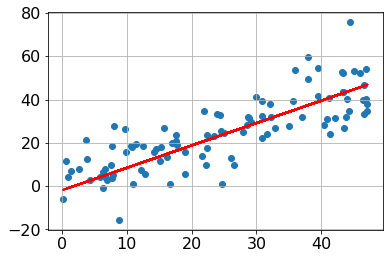

In [6]:
plt.scatter(X, y)
plt.plot(X, w_0+w_1*X, 'r', lw=2)
plt.grid()

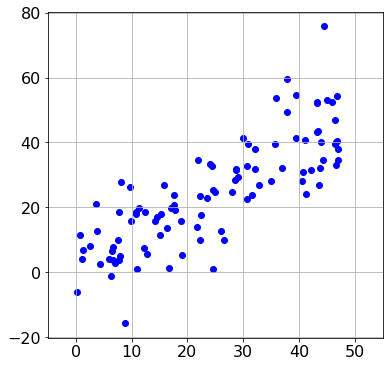

In [7]:
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_xlim([-5, 55])            
ax1.grid()
# Создадим объекты, которые будут меняться на каждой итерации
line1, = ax1.plot([], [], color='r', lw=2) 
line2 = ax1.scatter(X, y, color='b', lw=1)

num_frames = 100
if num_iter > num_frames:
    # Преобразуем массивы для анимации (не нужно строить каждый отсчет)
    coefs = coefs[::int((len(coefs)/num_frames)//1)]
else: num_frames = num_iter

In [8]:
# Данная функция рисует кадр. n - номер кадра
def drawframe(n):
    line1.set_data(X, coefs[n][0]+coefs[n][1]*X)
    return line1,

from matplotlib import animation
# blit=True перерисовывает только те части, которые были изменены
anim = animation.FuncAnimation(fig1, drawframe, frames=num_frames, interval=50, blit=True)
from IPython.display import HTML
HTML(anim.to_jshtml())

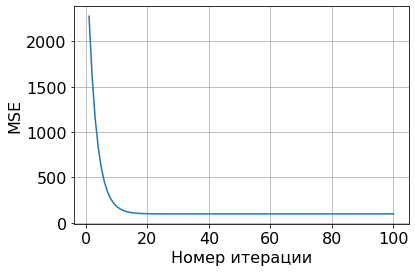

In [9]:
plt.plot(np.arange(1, num_iter+1), loss)
plt.xlabel('Номер итерации')
plt.ylabel('MSE')
plt.grid()